In [26]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt

# Problem 1

In [2]:
q1_data = pd.read_csv('C:\\Users\\Kevin\\Documents\\Programming\\Python\\ts\\ts\\model_compare.csv')

In [4]:
q1_data

,Date,By,Margin%,Customer_Count,Sales_Amount,Gross_amount
0,2020-09-07,Model A,2.81%,74,2448,68.80
1,2020-09-08,Model A,1.11%,92,3232,35.72
2,2020-09-09,Model A,1.86%,120,3948,73.29
3,2020-09-10,Model A,2.20%,63,2207,48.45
4,2020-09-11,Model A,1.61%,64,2155,34.68
5,2020-09-12,Model A,0.64%,265,8484,54.29
6,2020-09-13,Model A,0.28%,241,7857,22.37
7,2020-09-07,Model B,3.31%,29,863,28.54
8,2020-09-08,Model B,1.36%,25,800,10.88
9,2020-09-09,Model B,1.27%,29,986,12.56


Taking a look at the data up front we can see the margin amounts do not appear to be significantly different, and the biggest place the models differ is from the amount of customers. Naturally, more customers would be able to generate higher amounts. To be able to compare their performance it is best to look at these numbers scaled on a per customer basis.

In [3]:
q1_data['gross_per_cust'] = q1_data['Gross_amount'] / q1_data['Customer_Count']
q1_data['sales_per_cust'] = q1_data['Sales_Amount'] / q1_data['Customer_Count']
q1_data['Margin%'] = q1_data['Margin%'].apply(lambda x: x[:-1])
q1_data['Margin%'] = q1_data['Margin%'].astype(float)

In [5]:
q1_data

,Date,By,Margin%,Customer_Count,Sales_Amount,Gross_amount,gross_per_cust,sales_per_cust
0,2020-09-07,Model A,2.81,74,2448,68.80,0.929730,33.081081
1,2020-09-08,Model A,1.11,92,3232,35.72,0.388261,35.130435
2,2020-09-09,Model A,1.86,120,3948,73.29,0.610750,32.900000
3,2020-09-10,Model A,2.20,63,2207,48.45,0.769048,35.031746
4,2020-09-11,Model A,1.61,64,2155,34.68,0.541875,33.671875
5,2020-09-12,Model A,0.64,265,8484,54.29,0.204868,32.015094
6,2020-09-13,Model A,0.28,241,7857,22.37,0.092822,32.601660
7,2020-09-07,Model B,3.31,29,863,28.54,0.984138,29.758621
8,2020-09-08,Model B,1.36,25,800,10.88,0.435200,32.000000
9,2020-09-09,Model B,1.27,29,986,12.56,0.433103,34.000000


In [41]:
q1_data.groupby(by='By').mean()

,Margin%,Customer_Count,Sales_Amount,Gross_amount,gross_per_cust,sales_per_cust
By,,,,,,
Model A,1.501429,131.285714,4333.000000,48.228571,0.505336,33.490270
Model B,1.427143,31.285714,1013.857143,12.125714,0.453708,32.287684


In [42]:
q1_data.groupby(by='By').median()

,Margin%,Customer_Count,Sales_Amount,Gross_amount,gross_per_cust,sales_per_cust
By,,,,,,
Model A,1.61,92,3232,48.45,0.541875,33.081081
Model B,1.27,29,863,10.88,0.433103,32.095238


In [43]:
q1_data.groupby(by='By').std()

,Margin%,Customer_Count,Sales_Amount,Gross_amount,gross_per_cust,sales_per_cust
By,,,,,,
Model A,0.887683,85.692696,2702.671148,18.693772,0.298958,1.195888
Model B,1.060923,12.065299,408.721351,8.538282,0.322323,1.497402


Taking a look now, a quick skim shows that the amounts and statistics per customer seem to be in the same range. It would be best to apply a MANOVA test to see if it can be said that the models performances are not the same.

In [22]:
from statsmodels.multivariate.manova import MANOVA

In [20]:
stripped_data = q1_data.loc[:,['By','Margin%','gross_per_cust','sales_per_cust']]

In [21]:
stripped_data

,By,Margin%,gross_per_cust,sales_per_cust
0,Model A,2.81,0.929730,33.081081
1,Model A,1.11,0.388261,35.130435
2,Model A,1.86,0.610750,32.900000
3,Model A,2.20,0.769048,35.031746
4,Model A,1.61,0.541875,33.671875
5,Model A,0.64,0.204868,32.015094
6,Model A,0.28,0.092822,32.601660
7,Model B,3.31,0.984138,29.758621
8,Model B,1.36,0.435200,32.000000
9,Model B,1.27,0.433103,34.000000


In [30]:
stripped_data.rename(columns={"Margin%": "Margin"}, inplace=True)

In [34]:
print(MANOVA.from_formula('gross_per_cust + sales_per_cust + Margin ~ By', data=stripped_data).mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda    0.0006 3.0000 10.0000 5450.3203 0.0000
         Pillai's trace    0.9994 3.0000 10.0000 5450.3203 0.0000
 Hotelling-Lawley trace 1635.0961 3.0000 10.0000 5450.3203 0.0000
    Roy's greatest root 1635.0961 3.0000 10.0000 5450.3203 0.0000
-----------------------------------------------------------------
                                                                 
------------------------------------------------------------------
            By            Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.7827  3.0000  10.0000   0.9256  0.4635
          Pillai's trace  

### Conclusion

From a MANOVA test it is not possible to say that either model gives significantly different performance on a per customer basis. The best model to be chosen thus depends on which more closely matches the expected conditions in which the model will be operating; Model A having around 90-100 customers, and model B being around 30 customers.

Although if it can be expected to have customers such that you can break up testing into two groups of ~100 and ~30, then **Model A** more closely matches those conditions and thus should be chosen.

# Problem 2

In [2]:
q2_data = pd.read_csv('C:\\Users\\Kevin\\Documents\\Programming\\Python\\ts\\ts\\buyer.csv')

In [3]:
q2_data

,User,Age,Gender,Annual income,Married,Buy
0,1,27,Male,150k,False,False
1,2,47,Female,300k,True,True
2,3,32,Male,120k,False,False
3,4,24,Male,450k,False,True
4,5,45,Male,300k,True,False
5,6,56,Male,320k,True,True
6,7,31,Male,150k,False,False
7,8,23,Female,300k,True,False
8,9,42,Male,230k,False,False
9,10,32,Female,420k,True,True


In [4]:
q2_data_processing = q2_data.copy()

### Data Processing

In [6]:
q2_data_processing['Male'] = q2_data_processing['Gender'].apply(lambda x: 1 if (x[0] == 'M') else 0)
q2_data_processing['Annual income'] = q2_data_processing['Annual income'].apply(lambda x: x[:-1])
q2_data_processing['Annual income'] = q2_data_processing['Annual income'].astype(int)
q2_data_processing['Married'] = q2_data_processing['Married'].apply(lambda x: 1 if x else 0)
q2_data_processing['target'] = q2_data_processing['Buy'].apply(lambda x: 1 if x else 0)

In [8]:
processed_data = q2_data_processing[['Age','Annual income','Married','Male','target']]

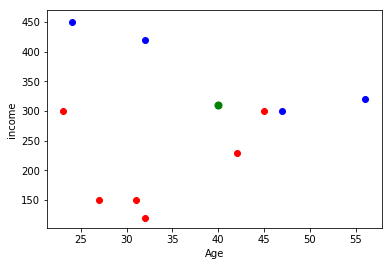

In [38]:
plt.scatter(processed_data.loc[processed_data['target']==0,'Age'],processed_data.loc[processed_data['target']==0,'Annual income'],c='red')
plt.scatter(processed_data.loc[processed_data['target']==1,'Age'],processed_data.loc[processed_data['target']==1,'Annual income'],c='blue')
plt.scatter(40,310,s=50,c='green')
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

### first analysis
The above plot gives a look at the current data and what we are trying to predict. Although this does not take into account Marriage status and M/F, the plot presents a good picture of what an imagined boundary might look like based off of just these two features alone. It's also possible to see a non-linear separation boundary which will dictate which models we would like to try.

Our test case, green, in this instance lies very much on the boundary so the extra features should come in handy for deciding.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

For this problem we will try out 4 different models on the data and compare the results

In [90]:
model_2 = RandomForestClassifier(n_estimators=5, random_state=42)
svm_model = svm.SVC(gamma='auto')
nb_model = GaussianNB()
kn_model = KNeighborsClassifier(n_neighbors=3)

In [91]:
X = processed_data.to_numpy()[:,0:4]
Y = processed_data.to_numpy()[:,4]

In [92]:
model_2.fit(X,Y)
svm_model.fit(X,Y)
nb_model.fit(X,Y)
kn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [76]:
print(f'randomForest: \t {model_2.score(X,Y)}')
print(f'SVM: \t {svm_model.score(X,Y)}')
print(f'Bayes: \t {nb_model.score(X,Y)}')
print(f'KNN: \t {kn_model.score(X,Y)}')

randomForest: 	 0.9
SVM: 	 1.0
Bayes: 	 0.8
KNN: 	 1.0


In [93]:
model_2.predict(np.array([40, 310, 0, 0]).reshape(1,-1))

array([0], dtype=int64)

In [86]:
svm_model.predict(np.array([40, 310, 0, 0]).reshape(1,-1))

array([0], dtype=int64)

In [94]:
nb_model.predict(np.array([40, 310, 0, 0]).reshape(1,-1))

array([1], dtype=int64)

In [95]:
kn_model.predict(np.array([40, 310, 0, 0]).reshape(1,-1))

array([1], dtype=int64)

It appears that our models are split down the middle on our predictions. We have a 100% accuracy model for both 'yes' and 'no' and we also have a less than 100% model at 'yes' and 'no'

However if we recall the plot we can see that our test case is right on the edge of a visible boundary. Since we know that the process of taking on a new customer is expensive, we can then look at how *sure* each model is in its prediction.

In [96]:
model_2.predict_proba(np.array([40, 310, 0, 0]).reshape(1,-1)) #Random Forest

array([[0.8, 0.2]])

In [98]:
nb_model.predict_proba(np.array([40, 310, 0, 0]).reshape(1,-1)) #Naive Bayes

array([[0.34180043, 0.65819957]])

In [99]:
kn_model.predict_proba(np.array([40, 310, 0, 0]).reshape(1,-1)) #KNN

array([[0.33333333, 0.66666667]])

Checking the raw probabilities, we see that the random forest model results in an 80% chance of the **negative** class, while Naive Bayes and KNN have both 65 and 66% respectively for the **positive** class. Unfortunately for SVM we do not have enough data to make use of the probabilities feature. However, if we were to change our "acceptance" criteria for a positive result to, say 75-80% (since the process is expensive and our data is limited we want to really make sure before we pursue a customer) both of these models would return a negative classification.

In [103]:
nb_model.predict_proba(np.array([40, 310, 0, 0]).reshape(1,-1))[0][1] > .8

False

In [102]:
kn_model.predict_proba(np.array([40, 310, 0, 0]).reshape(1,-1))[0][1] > .8

False

### Conclusion

Based on the above information we can thus conclude that the customer should not be pursued

# Problem 3

In [42]:
q3_data = pd.read_csv('C:\\Users\\Kevin\\Documents\\Programming\\Python\\ts\\ts\\sale_amount.csv')

In [43]:
q3_data

,Day,Sale amount (million)
0,1,1.08
1,21,0.90
2,41,0.72
3,61,0.58
4,81,0.48
5,101,0.42
6,121,0.37
7,141,0.33
8,161,0.26
9,181,0.24


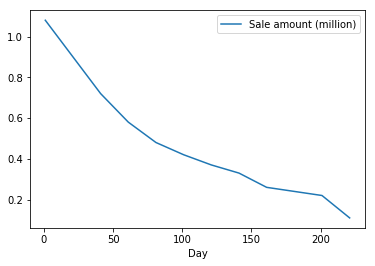

In [44]:
q3_data.plot(x='Day',y='Sale amount (million)')

In [106]:
def f(x, a, k, b):
    return a * np.exp(-k*x) + b

In [108]:
%%capture
opt, pcov = scipy.optimize.curve_fit(f, q3_data['Day'],q3_data['Sale amount (million)'])

In [48]:
x2 = np.linspace(1,1000,20)
y2 = f(x2,opt[0],opt[1],opt[2])

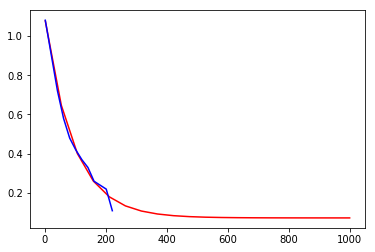

In [104]:
plt.plot(x2,y2, color='r', label='function')
plt.plot(q3_data['Day'].to_numpy(),q3_data['Sale amount (million)'].to_numpy(), 'blue', label='original data')
plt.show()

In [51]:
day_500 = model_func(500,opt[0],opt[1],opt[2])
day_1000 = model_func(1000,opt[0],opt[1],opt[2])

In [89]:
print(f'day 500: {day_500 * 10**6} \t day 1000: {day_1000 * 10**6}')

day 500: 78258.5249253015 	 day 1000: 73303.5785013652


### Conclusion

Based on the model fit to the data we can expect about 78,000 and 73,000 copies sold in the 500th and 1000th day respectively